# Sebastián González Juárez
## Solución de segundo día.

<center>
<img src="https://www.plri.de/assets/images/logo_plri_de.png"
width="200">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Siegel_TU_Braunschweig_transparent.svg/800px-Siegel_TU_Braunschweig_transparent.svg.png"
width="250">
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Medizinische_Hochschule_Hannover_logo.svg"
width="250">
<img src="https://images.seeklogo.com/logo-png/38/2/universidad-nacional-autonoma-de-mexico-unam-logo-png_seeklogo-387361.png" width="110">
</center>

<font color="Teal" face="Georgia,arial">
  <h1 align="center"><b></b></h1>
  <h1 align="center"><i><b>Fully Connected</b></i></h1>
  </font>
  <font color="Black" face="Georgia,arial">
  <h5 align="center"><i><b></b></i></h5>
  <h5 align="center"><i><b></b></i></h5>
</font>

**CONTENTS**

The main idea is to build and train a simple multilayer perceptron (fully connected network) to classify data (such as handwritten digits). This process is based on deep learning techniques, where the model learns to recognize patterns from the input data through layers of neurons, activation functions, and optimization during training.

FullyConnected.ipynb: Main notebook where the code is organized to load data, define the model, train it, and evaluate its performance.

Results and plots: Includes accuracy metrics and visualizations of predictions.

----------------------------------------

**🚀 HOW TO USE THE CODE?**

1. Open the Style_Transfer.ipynb notebook in Google Colab.

* Go to the menu: File > Save a copy to Drive
* Gray cells with code are executed with Shift + Enter

----------------------------------------

**🔧 HOW TO RUN THE NOTEBOOK?**

1. Locate the block of code you want to run.
In the upper left corner of the block, click on the triangle button ▶️

2. Wait for a green check mark ✅ to appear next to the block: this indicates that it has finished executing.

----------------------------------------

**📝 ADDITIONAL NOTES**

- The code may take between 10 and 15 minutes to load.

----------------------------------------
**🙋 IF YOU HAVE ANY QUESTIONS ABOUT HOW TO USE THE CODE, YOU CAN SEND US AN EMAIL**

Email for questions -- unam.tubs@gmail.com

Attach a screenshot if you get an error message.

The following code sets the necessary imports and loads the MNIST-dataset

In [1]:
!pip install tensorflow


In [2]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


This code visualizes the 10th image and the corresponding label

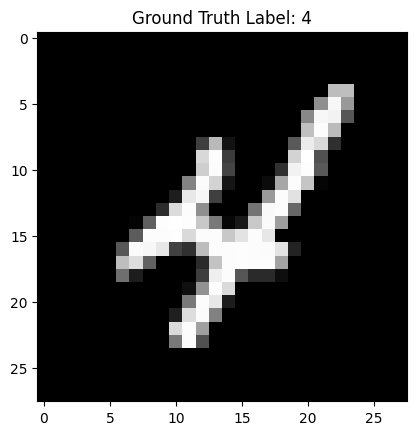

In [3]:
# 2. Visualization
# 2a. Visualize the 10th image
plt.imshow(X_train[9], cmap='gray')
plt.title(f"Ground Truth Label: {y_train[9]}")
plt.show()


If we visualize 8 random images, we can see that some of them are skewed

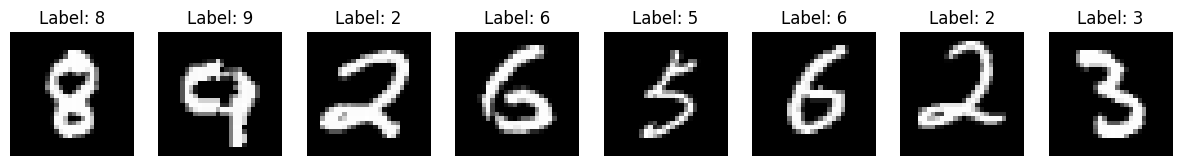

In [4]:
# 2b. Visualize 8 random images
fig, axes = plt.subplots(1, 8, figsize=(15, 5))
for i, ax in enumerate(axes):
    idx = np.random.randint(0, len(X_train))
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_title(f"Label: {y_train[idx]}")
    ax.axis('off')
plt.show()


This code calculates the “moments” of the image (a way to measure the shape and orientation of the pixels).

From those moments, it figures out how much the image is leaning left or right (the skew).

If the image isn’t skewed, it just returns it unchanged.

If it is skewed, it builds a small transformation matrix.

Finally, it applies this transformation so the number looks more upright.

In [5]:
# 3. Deskew function (example)
import cv2
def deskew(image):
    moments = cv2.moments(image)
    if moments['mu02'] == 0:
        return image
    skew = moments['mu11'] / moments['mu02']
    matrix = np.float32([[1, skew, -0.5 * skew], [0, 1, 0]])
    rows, cols = image.shape
    return cv2.warpAffine(image, matrix, (cols, rows), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)


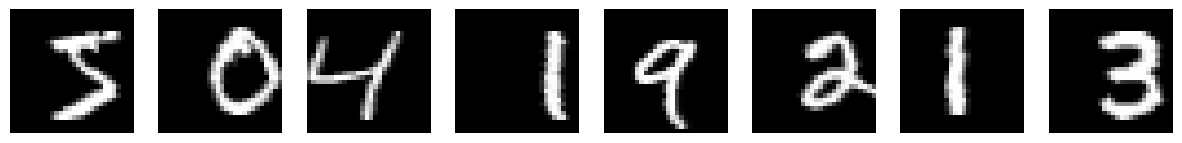

In [6]:
# Deskew and visualize results
deskewed_images = [deskew(image) for image in X_train[:8]]
fig, axes = plt.subplots(1, 8, figsize=(15, 5))
for ax, img in zip(axes, deskewed_images):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()

X_train_deskew = np.array([deskew(img) for img in X_train], dtype=np.uint8)
X_test_deskew  = np.array([deskew(img) for img in X_test],  dtype=np.uint8)


For our fully connected feed forward network, we need to flatten the 28x28 image into a 1D Vector

Since the pixel values are expressed as in the range of 255 but we need them as a 0-1 float, we divide the values by 255

In [7]:
# 4. Flatten the images
X_train_flattened = X_train_deskew.reshape(-1, 28 * 28).astype('float32') / 255
X_test_flattened = X_test_deskew.reshape(-1, 28 * 28).astype('float32') / 255


In [8]:
# One-hot encode labels
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)


In [9]:
# 5. Model definition
model = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [10]:
# 6. Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 7. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Explanation:
# - optimizer='adam': smart gradient descent that adapts learning rates
# - loss='categorical_crossentropy': compares predicted probabilities vs. one-hot true labels (for multi-class classification)
# - metrics=['accuracy']: track how many predictions are correct

In [12]:
# 8. Train the model
history = model.fit(X_train_flattened, y_train_categorical, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7781 - loss: 0.7619 - val_accuracy: 0.9372 - val_loss: 0.2106
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9449 - loss: 0.1856 - val_accuracy: 0.9498 - val_loss: 0.1731
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9618 - loss: 0.1274 - val_accuracy: 0.9564 - val_loss: 0.1450
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9729 - loss: 0.0935 - val_accuracy: 0.9580 - val_loss: 0.1367
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9761 - loss: 0.0745 - val_accuracy: 0.9596 - val_loss: 0.1392
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9636 - val_loss: 0.1274
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9845 - loss: 0.0476 - val_accuracy: 0.9629 - val_loss: 0.1344
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9890 - loss: 0.0379 - val_accuracy: 0.

In [13]:
# 9. Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test_categorical)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9643 - loss: 0.1452
Test Loss: 0.12776342034339905, Test Accuracy: 0.9682999849319458


In [14]:
# 10. Predict and interpret
predictions = model.predict(X_test_flattened[:5])
for i, prediction in enumerate(predictions):
    print(f"Prediction for image {i}: {np.argmax(prediction)}, True Label: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Prediction for image 0: 7, True Label: 7
Prediction for image 1: 2, True Label: 2
Prediction for image 2: 1, True Label: 1
Prediction for image 3: 0, True Label: 0
Prediction for image 4: 4, True Label: 4


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


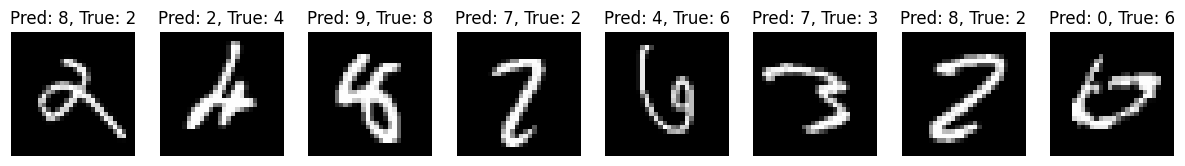

In [15]:
# 11. Analyze incorrect predictions
y_pred = np.argmax(model.predict(X_test_flattened), axis=1)
incorrect_idx = np.where(y_pred != y_test)[0]

# Plot some incorrect predictions
fig, axes = plt.subplots(1, 8, figsize=(15, 5))
for ax, idx in zip(axes, incorrect_idx[:8]):
    ax.imshow(X_test[idx], cmap='gray')
    ax.set_title(f"Pred: {y_pred[idx]}, True: {y_test[idx]}")
    ax.axis('off')
plt.show()